LAST UPDATED ON 2023/04/30 

1. Find out duplicate images or incorrect label

In [1]:
import os
import cv2
import json
import random
import numpy as np

from marco import *
from visualise import *
from matplotlib import pyplot as plt

In [2]:
#resized image size
RESIZE_SIZE = 448
#number of grid in one row/col
GRID_NUM = 7
#define folder to be checked
CLS_FOLDER = 'cat'
ROOT = os.path.join('cat_and_dog_det_data', CLS_FOLDER)

# Load Image Path

In [3]:
img_path = os.listdir(ROOT)
img_path = [os.path.join(ROOT, file) for file in img_path if file.split('.')[-1] == 'jpg']
img_path = sorted(img_path)

print("N_data: ", len(img_path))

N_data:  1174


# Load Images

In [4]:
imgs = [None]*len(img_path)
for i in range(len(img_path)):
    img = cv2.imread(img_path[i])
    img_h, img_w, _ = img.shape
    imgs[i] = cv2.resize(img, (RESIZE_SIZE, RESIZE_SIZE), cv2.INTER_AREA)

# Check Duplicated Images

In [5]:
#define number of pixels to be compared
N_comp = 20
#define the threshold of value difference
diff_t = 10
is_check = [False]*len(img_path)
for i in range(len(img_path)):
    if is_check[i]:
        continue
    for j in range(i + 1, len(img_path)):
        diff = 0
        for k in range(N_comp):
            r_ind = np.random.randint(low = 0, high = RESIZE_SIZE)
            c_ind = np.random.randint(low = 0, high = RESIZE_SIZE)
            
            diff += abs(float(imgs[i][r_ind, c_ind, 0]) - float(imgs[j][r_ind, c_ind, 0])) + \
                    abs(float(imgs[i][r_ind, c_ind, 1]) - float(imgs[j][r_ind, c_ind, 1])) + \
                    abs(float(imgs[i][r_ind, c_ind, 2]) - float(imgs[j][r_ind, c_ind, 2]))
                    
        diff /= N_comp*3
        
        if diff <= diff_t:
            is_check[j] = True
            print('1st: ', img_path[i], '2nd: ', img_path[j], 'diff:', diff)
            print('1st')
            plt.imshow(imgs[i])
            plt.show()
            print('2nd')
            plt.imshow(imgs[j])
            plt.show()

# Check Bad Labels

In [6]:
for path in img_path:
    file_name = path.split('.')[0]
    lab = json.load(open(os.path.join(file_name + '.json')))
    
    boxes = lab['boxes']
    clses = lab['class']
    
    label_mat = np.zeros((GRID_NUM, GRID_NUM, 1))
    
    for i, box in enumerate(boxes):
        
        cls = np.argmax(np.array(clses[i]))
        
        if IND2CLS[cls] != CLS_FOLDER:
            print(path, 'wrong class')
             
        xc, yc = (box[0] + box[2])/2., (box[1] + box[3])/2.
        c_ind, r_ind = int(xc*GRID_NUM), int(yc*GRID_NUM)
        
        if label_mat[r_ind, c_ind, 0] == 0:
            label_mat[r_ind, c_ind, 0] = 1
        else:
            print(path, 'multi-objs in the same cell')

# Plot Bounding Boxes

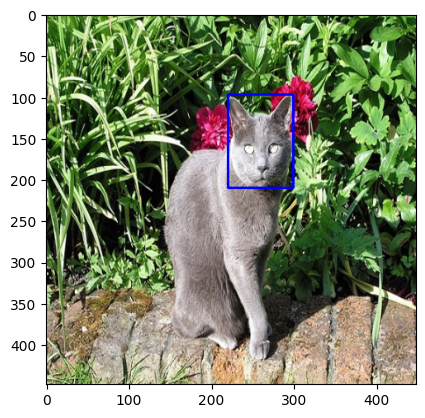

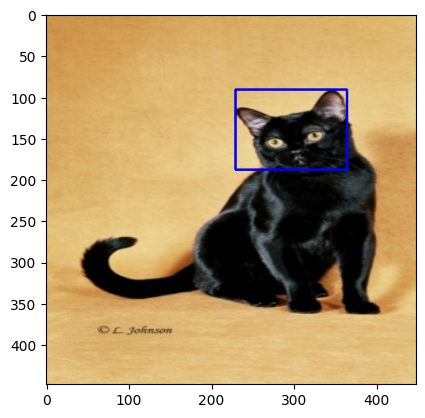

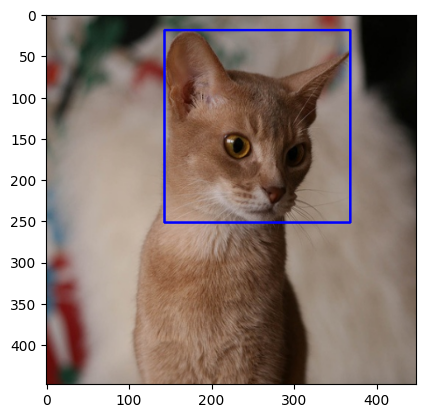

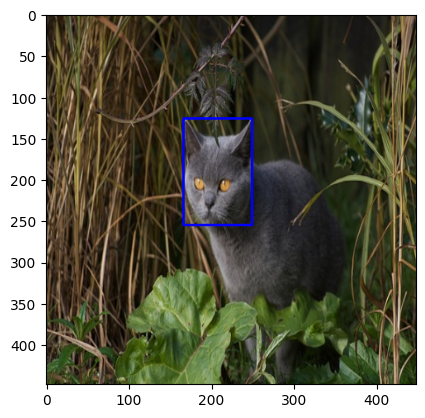

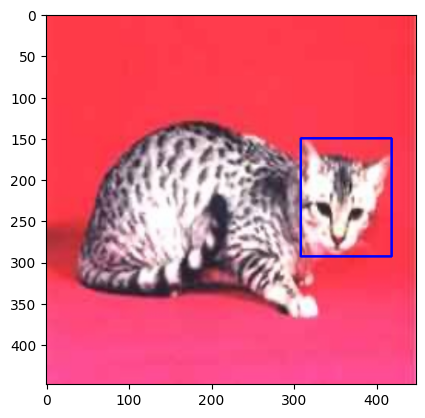

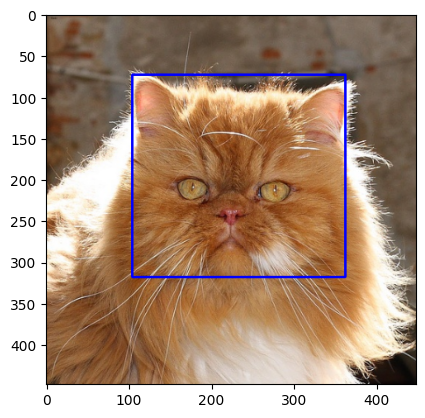

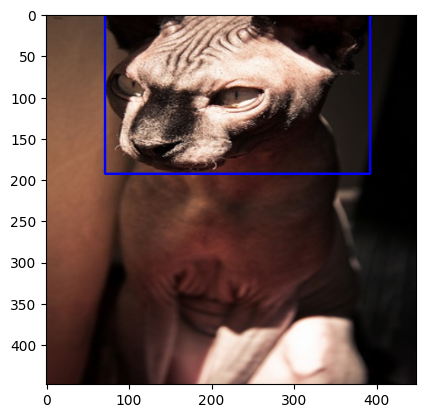

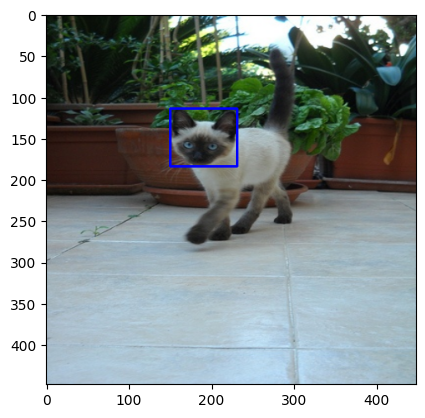

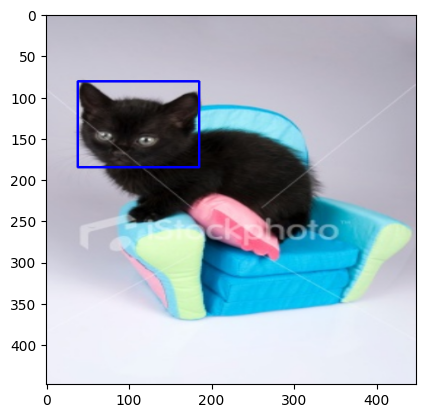

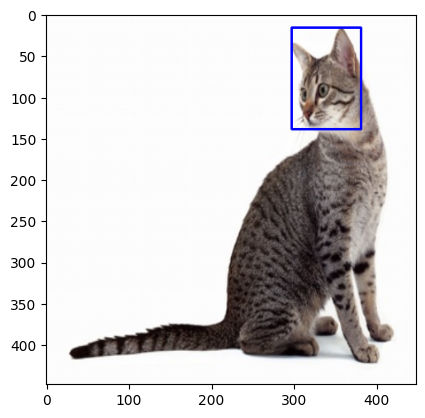

In [7]:
rand_path = random.sample(img_path, 10)
for img_load in rand_path:
    #print(rand_path[i])
    file_name = img_load.split('.')[0]
    img = cv2.imread(img_load)
    lab = json.load(open(os.path.join(file_name + '.json')))
    
    img = cv2.resize(img, (448, 448), cv2.INTER_AREA)
    boxes = lab['boxes']
    for j in range(len(boxes)):
        boxes[j][0], boxes[j][1] = boxes[j][0]*img.shape[1], boxes[j][1]*img.shape[0]
        boxes[j][2], boxes[j][3] = boxes[j][2]*img.shape[1], boxes[j][3]*img.shape[0]
   
    img = visualise_boxes(img, boxes, color = [255, 0, 0])
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()